# Notebook 4 - Education and Salary - a first overview.

This notebook aims to create a single dataframe collecting data from the _Census.Gov_ page with information on:
1. Education Levels - Namely the percentage of Over25 that hold a Bachelor's degree
2. Education Institution Presence - from the Firms API we analysed the "educational services" category (number 61) that showed us per each county how many educ. centres were present (this includes kindergarten, schools of any level and university)
3. Salary - The total income of the county

**PLEASE NOTE** While the aim of our research is to show an uniform patter in all states of the United States, we will only take into consideration the state of California, in order to speed up the output results.


We start by importing the necessary libraries, retrieving the data from the API and analysing only the state of California for the sake of notebook size, we will proceed to a further analysis in a later step of our project

In [28]:
#Required imports for the project
import requests # for api requests
import pandas as pd #tabular data

from bs4 import BeautifulSoup

In [29]:
# !! REMINDER TO TAKE API KEY OUT OF CODE BEFORE SUBMITTING !!
api_key = ""

In [30]:
#creating a dataframe function
def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [31]:
#Creating a function to remove the leading zeros from a column
def remove_leading_zeros(df, column):
    df[column] = df[column].str.lstrip('0')
    return df

In [32]:
#Setting up the API Query parameters for the educational services industry
params1 = {"NAICS2017" : 61}

In [33]:
#Requesting the json file from the census website using the api key
url = "https://api.census.gov/data/2017/ecnbasic?get=NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM&for=county:*&key={}".format(api_key)
response = requests.request("GET", url, params=params1)

In [34]:
response.text[0:77]

'[["NAICS2017_LABEL","NAICS2017","GEO_ID","FIRM","NAICS2017","state","county"]'

In [35]:
#Converting ecn data frame into pandas data frame
educational_services = json_to_dataframe(response)
df = pd.DataFrame(data = educational_services)
df['FIRM'] = df['FIRM'].astype(int)
df['state'] = df['state'].astype("string")
df_california1 = df[df['state'] == '06']

In [36]:
# Top 5 counties with largest number of educational services
df_c_sort = df_california1\
.sort_values(by=['FIRM'], ascending=False)\
.head(10)
print('Top 10 counties with the most amount of educational services in California')
df_c_sort

Top 10 counties with the most amount of educational services in California


,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state,county
298,Educational services,61,0500000US06037,2787,61,06,037
314,Educational services,61,0500000US06059,1187,61,06,059
329,Educational services,61,0500000US06073,1010,61,06,073
301,Educational services,61,0500000US06085,822,61,06,085
209,Educational services,61,0500000US06001,693,61,06,001
214,Educational services,61,0500000US06075,470,61,06,075
210,Educational services,61,0500000US06067,334,61,06,067
318,Educational services,61,0500000US06081,323,61,06,081
299,Educational services,61,0500000US06065,313,61,06,065
203,Educational services,61,0500000US06013,295,61,06,013


In [37]:
#Number of counties in the enc dataset for California
df_california1['county'].count()

48

In [38]:
#Setting the params
params2 = {"state" : "06"}

In [39]:
#Getting the ACS data
#Requesting the json file from the census website using the api key 
url = "https://api.census.gov/data/2017/acs/acs1/profile?get=DP02_0064PE,DP02_0088PE,DP02_0123PE&for=county&key={}".format(api_key)
response2 = requests.request("GET", url)

In [40]:
#Seeing what the columns for the data are
response2.text[0:61]

'[["DP02_0064PE","DP02_0088PE","DP02_0123PE","state","county"]'

## Meaning of variables
- **DP02_0064PE** = Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree

In [41]:
pop_chars = json_to_dataframe(response2)
df = pd.DataFrame(data = pop_chars)
df_california2 = df[df['state'] == '06']

In [42]:
#Number of counties in the acs dataset for California
df_california2['county'].count()

40

In [43]:
#Merging the two datasets
merged_census = pd.merge(df_california1, df_california2, on='county')
#drop state_y column and rename state_x to state
merged_census = merged_census.drop(columns=['state_y', 'NAICS2017'])
merged_census = merged_census.rename(columns={'state_x': 'state', 'FIRM':'Number of Educational Institutions','DP02_0064PE':'Percent of Population with a Bachelor\'s Degree'})
#Convert the columns to the correct data types
merged_census['Percent of Population with a Bachelor\'s Degree'] = merged_census['Percent of Population with a Bachelor\'s Degree'].astype(float)
merged_census['county'] = merged_census['county'].astype(int)
# The last two columns are currently unneeded but will be later used for contextual analysis.
#Drop the last two columns
merged_census = merged_census.drop(columns=['DP02_0088PE', 'DP02_0123PE'])

In [44]:
merged_census.head()

,NAICS2017_LABEL,GEO_ID,Number of Educational Institutions,state,county,Percent of Population with a Bachelor's Degree
0,Educational services,0500000US06047,13,06,47,8.7
1,Educational services,0500000US06033,8,06,33,9.5
2,Educational services,0500000US06115,0,06,115,13.9
3,Educational services,0500000US06013,295,06,13,26.7
4,Educational services,0500000US06099,71,06,99,12.0


In [45]:
#Getting the list of counties in the ACS data for california
acs_counties = merged_census['county'].tolist()
acs_counties
#Getting the list of county names from the census website
ca_counties = pd.read_csv("../data/cal_counties.csv")
#Drop the state name and state number columns
ca_counties = ca_counties.drop(columns=['State_Name', 'State'])
ca_counties

,County,County_Name
0,1,Alameda County
1,3,Alpine County
2,5,Amador County
3,7,Butte County
4,9,Calaveras County
5,11,Colusa County
6,13,Contra Costa County
7,15,Del Norte County
8,17,El Dorado County
9,19,Fresno County


In [46]:
#Merge the merged_census dataframe with the ca_counties dataframe to get the county names
merged_census = pd.merge(merged_census, ca_counties, left_on= 'county', right_on = 'County')
#Reshape the GEO_ID to get the FIPS code
merged_census['GEO_ID'] = merged_census['GEO_ID'].str[9:]

merged_census

,NAICS2017_LABEL,GEO_ID,Number of Educational Institutions,state,county,Percent of Population with a Bachelor's Degree,County,County_Name
0,Educational services,06047,13,06,47,8.7,47,Merced County
1,Educational services,06033,8,06,33,9.5,33,Lake County
2,Educational services,06115,0,06,115,13.9,115,Yuba County
3,Educational services,06013,295,06,13,26.7,13,Contra Costa County
4,Educational services,06099,71,06,99,12.0,99,Stanislaus County
5,Educational services,06083,137,06,83,21.2,83,Santa Barbara County
6,Educational services,06097,161,06,97,22.6,97,Sonoma County
7,Educational services,06025,5,06,25,10.4,25,Imperial County
8,Educational services,06001,693,06,1,26.9,1,Alameda County
9,Educational services,06067,334,06,67,20.0,67,Sacramento County


In [47]:
#Drop the columns that are not needed
#merged_census = merged_census.drop(columns=['County_Name_x', 'County_x', 'County_y', 'County'])
merged_census = merged_census.drop(columns=['state', 'county'])
merged_census = merged_census.rename(columns={'County_Name_y': 'County_Name'})

In [48]:
#Converting the columns to the right data types
merged_census['Number of Educational Institutions'] = merged_census['Number of Educational Institutions'].astype(int)
merged_census['Percent of Population with a Bachelor\'s Degree'] = merged_census['Percent of Population with a Bachelor\'s Degree'].astype(float)
merged_census['County_Name'] = merged_census['County_Name'].astype('string')

In [49]:
# Remove NAICS2017_LABEL, state, county, County and County_name columns
merged_census = merged_census.drop(columns=['NAICS2017_LABEL', 'County', 'County_Name'])
#Create a copy of merged_census called education_data
education_data = merged_census.copy()
merged_census

,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree
0,06047,13,8.7
1,06033,8,9.5
2,06115,0,13.9
3,06013,295,26.7
4,06099,71,12.0
5,06083,137,21.2
6,06097,161,22.6
7,06025,5,10.4
8,06001,693,26.9
9,06067,334,20.0


## Getting the Code on National Income

In [50]:
#importing the excel file called "GDP_County_2021_NotPerCapita.xlsx" and transforming it into a pandas dataframe
###change the directory to the location of the excel file on your computer
gdp = pd.read_excel("file:GDP_County_2021_NotPerCapita.xlsx")
gdp

,StateName,CountyName,GDP
0,Alabama,Autauga,1502153
1,Alabama,Baldwin,7830237
2,Alabama,Barbour,709459
3,Alabama,Bibb,392249
4,Alabama,Blount,997835
...,...,...,...
3115,Wyoming,Sweetwater,3125840
3116,Wyoming,Teton,2862327
3117,Wyoming,Uinta,771851
3118,Wyoming,Washakie,346859


In [51]:
#Including only the rows that have the state name as California
gdp_df = gdp[gdp['StateName'] == 'California']
#Drop the state name column from the dataframe
gdp_df = gdp_df.drop(columns=['StateName'])
#Convert the county name column to the correct data types
gdp_df['CountyName'] = gdp_df['CountyName'].astype('string')

In [52]:
gdp_df

,CountyName,GDP
188,Alameda,130465391
189,Alpine,94933
190,Amador,1612883
191,Butte,8094801
192,Calaveras,1368814
193,Colusa,1194522
194,Contra Costa,73533985
195,Del Norte,721464
196,El Dorado,7378023
197,Fresno,41821044


In [54]:
#Ordering the gdp df by descending order of GDP
gdp_df = gdp_df.sort_values(by=['GDP'], ascending=False)

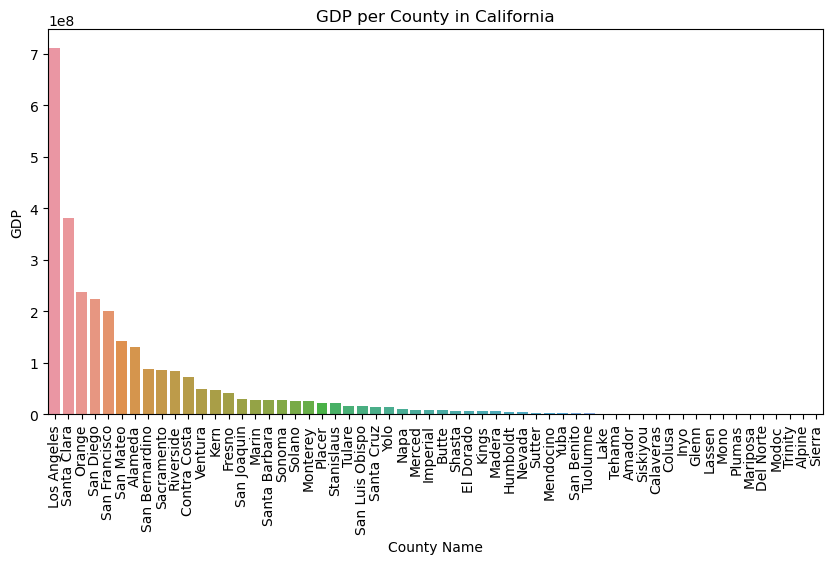

In [55]:
#Graphing GDO per county with a bar plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x='CountyName', y='GDP', data=gdp_df)
plt.xticks(rotation=90)
plt.title('GDP per County in California')
plt.xlabel('County Name')
plt.ylabel('GDP')
plt.show()

In [56]:
codes = pd.read_excel("fips2county.xlsx")
codes.head(20)
#In CountyFIPS column, if the value is under 10000, add a 0 in front of it
codes['CountyFIPS'] = codes['CountyFIPS'].apply(lambda x: '{0:0>5}'.format(x))
codes.head(20) 

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY
0,1,1,Autauga,Alabama,01001,AL,AL | AUTAUGA
1,1,3,Baldwin,Alabama,01003,AL,AL | BALDWIN
2,1,5,Barbour,Alabama,01005,AL,AL | BARBOUR
3,1,7,Bibb,Alabama,01007,AL,AL | BIBB
4,1,9,Blount,Alabama,01009,AL,AL | BLOUNT
5,1,11,Bullock,Alabama,01011,AL,AL | BULLOCK
6,1,13,Butler,Alabama,01013,AL,AL | BUTLER
7,1,15,Calhoun,Alabama,01015,AL,AL | CALHOUN
8,1,17,Chambers,Alabama,01017,AL,AL | CHAMBERS
9,1,19,Cherokee,Alabama,01019,AL,AL | CHEROKEE


In [ ]:
#For each row of GDP get the CountyFIPS corresponding to the county name and state in the codes dataframe
#Then add the CountyFIPS to the GDP dataframe

### TO - DO

# Correction: Using the GDP from 2017, to match the education data
Using the US Bureau of Economic Analysis excel data frame, we retriece the data on GDP per county. This table contains the GEO_ID, making easier the merge with the education data that we already have.

In [61]:
import pandas as pd
#import excel file and convert to dataframe
us_gdp = pd.read_excel("../data/us_gdp_2009-18.xlsx")
# if GeoFIPS is under 10000, add a 0 in front of it
us_gdp['Clean GeoFIPS'] = us_gdp['Clean GeoFIPS'].apply(lambda x: '{0:0>5}'.format(x))
#convert GeoFIPS to string
us_gdp['Clean GeoFIPS'] = us_gdp['Clean GeoFIPS'].astype('string')
#keep only Clean GEOFIPS and GDP per Capita 2017
us_gdp = us_gdp[['Clean GeoFIPS', 'GDP per Capita 2017']]
#rename Clean GeoFIPS to GEO_ID
us_gdp = us_gdp.rename(columns={'Clean GeoFIPS': 'GEO_ID'})
us_gdp.head(20)

,GEO_ID,GDP per Capita 2017
0,01001,25.839051
1,01003,27.172905
2,01005,28.457883
3,01007,15.671346
4,01009,14.114381
5,01011,22.287746
6,01013,27.568717
7,01015,33.422040
8,01017,57.181236
9,01019,17.838832


In [63]:
#Merge the gdp dataframe with the education_data dataframe
merged_gdp = pd.merge(education_data, us_gdp, on='GEO_ID')
merged_gdp.head(20)

,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree,GDP per Capita 2017
0,06047,13,8.7,35.545039
1,06033,8,9.5,32.864295
2,06115,0,13.9,39.997401
3,06013,295,26.7,67.186104
4,06099,71,12.0,41.056714
5,06083,137,21.2,60.634992
6,06097,161,22.6,54.739096
7,06025,5,10.4,45.505393
8,06001,693,26.9,77.198152
9,06067,334,20.0,55.173600


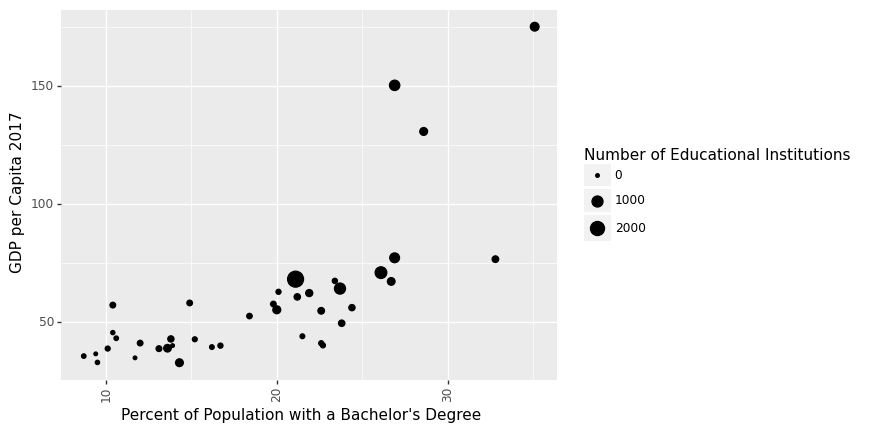

<ggplot: (8781539725153)>

In [64]:
# Create a scatterplot of the data with on the x-axis the percent of population with a Bachelor's Degree and on the y-axis the GDP per capita, the size of the bubbles is the number of educational institutions using plotnine
from plotnine import *
(ggplot(gdp_and_census, aes(x='Percent of Population with a Bachelor\'s Degree', y='GDP per Capita 2017', size='Number of Educational Institutions')) + geom_point() + theme(axis_text_x=element_text(angle=90)))
